<a href="https://colab.research.google.com/github/d7lewandowski/pyspark-script/blob/main/pyspark_training_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Rating Histogram Walkthrougth

In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=08c0ee5f7b01ad0987b07179d5a5d7d79dc24b559bdb0c1e1a634df404b65afe
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from pyspark import SparkConf, SparkContext
import collections

In [ ]:
conf = SparkConf().setMaster("local").setAppName('Raitings')
sc = SparkContext(conf = conf)

In [ ]:
lines = sc.textFile(r'/content/drive/MyDrive/Taming Big Data with Apache Spark and Python - Hands On!/Data/ml-100k/ml-100k/u.data')

In [ ]:
lines.collect()[:10]

['196\t242\t3\t881250949',
 '186\t302\t3\t891717742',
 '22\t377\t1\t878887116',
 '244\t51\t2\t880606923',
 '166\t346\t1\t886397596',
 '298\t474\t4\t884182806',
 '115\t265\t2\t881171488',
 '253\t465\t5\t891628467',
 '305\t451\t3\t886324817',
 '6\t86\t3\t883603013']

In [ ]:
ratings = lines.map(lambda x: x.split()[2])

In [ ]:
ratings.collect()[:10]

['3', '3', '1', '2', '1', '4', '2', '5', '3', '3']

In [ ]:
result = ratings.countByValue()
result

defaultdict(int, {'3': 27145, '1': 6110, '2': 11370, '4': 34174, '5': 21201})

In [ ]:
sortedResults = collections.OrderedDict(sorted(result.items()))
sortedResults

OrderedDict([('1', 6110),
             ('2', 11370),
             ('3', 27145),
             ('4', 34174),
             ('5', 21201)])

In [ ]:
for key, value in sortedResults.items():
  print(key, value)

1 6110
2 11370
3 27145
4 34174
5 21201


In [ ]:
sc.stop()

# 2. Key/Value RDD's and the Average Friends by Age Example

- reduceByKey(): combine values with the same key using some function. rdd.reduceByKey(lambda x, y: x+y) adds them up.
- groupByKey(): Group values with the same key
- sortByKey(): Sort RDD by key values
- keys(), values() - Create an RDD of just the keys, or just the values

In [ ]:
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession
import pandas as pd

In [ ]:
conf = SparkConf().setMaster('local').setAppName('FriendsByAge')

sc = SparkContext(conf = conf)
spark = SparkSession(sc)

In [ ]:
lines = sc.textFile(r"/content/drive/MyDrive/Taming Big Data with Apache Spark and Python - Hands On!/Data/fakefriends.csv")

In [ ]:
lines.collect()[:5]

['0,Will,33,385',
 '1,Jean-Luc,26,2',
 '2,Hugh,55,221',
 '3,Deanna,40,465',
 '4,Quark,68,21']

In [ ]:
def parseLine(line):
  fields = line.split(',')
  age = int(fields[2])
  numFriends = int(fields[3])
  return (age, numFriends)

rdd = lines.map(parseLine)

In [ ]:
rdd.collect()[:5]

[(33, 385), (26, 2), (55, 221), (40, 465), (68, 21)]

In [ ]:
totalByAge = rdd.mapValues(lambda x: (x, 1))
totalByAge.collect()[:5]

[(33, (385, 1)), (26, (2, 1)), (55, (221, 1)), (40, (465, 1)), (68, (21, 1))]

In [ ]:
totalByAge = totalByAge.reduceByKey(lambda x, y: (x[0] + y[0], x[1] + y[1]))

In [ ]:
totalByAge.collect()[:5]

[(33, (3904, 12)),
 (26, (4115, 17)),
 (55, (3842, 13)),
 (40, (4264, 17)),
 (68, (2696, 10))]

In [ ]:
averagesByAge = totalByAge.mapValues(lambda x: x[0] / x[1])
averagesByAge.collect()[:5]

[(33, 325.3333333333333),
 (26, 242.05882352941177),
 (55, 295.53846153846155),
 (40, 250.8235294117647),
 (68, 269.6)]

In [ ]:
results = averagesByAge.collect()

In [ ]:
for result in results:
  print(result)

(33, 325.3333333333333)
(26, 242.05882352941177)
(55, 295.53846153846155)
(40, 250.8235294117647)
(68, 269.6)
(59, 220.0)
(37, 249.33333333333334)
(54, 278.0769230769231)
(38, 193.53333333333333)
(27, 228.125)
(53, 222.85714285714286)
(57, 258.8333333333333)
(56, 306.6666666666667)
(43, 230.57142857142858)
(36, 246.6)
(22, 206.42857142857142)
(35, 211.625)
(45, 309.53846153846155)
(60, 202.71428571428572)
(67, 214.625)
(19, 213.27272727272728)
(30, 235.8181818181818)
(51, 302.14285714285717)
(25, 197.45454545454547)
(21, 350.875)
(42, 303.5)
(49, 184.66666666666666)
(48, 281.4)
(50, 254.6)
(39, 169.28571428571428)
(32, 207.9090909090909)
(58, 116.54545454545455)
(64, 281.3333333333333)
(31, 267.25)
(52, 340.6363636363636)
(24, 233.8)
(20, 165.0)
(62, 220.76923076923077)
(41, 268.55555555555554)
(44, 282.1666666666667)
(69, 235.2)
(65, 298.2)
(61, 256.22222222222223)
(28, 209.1)
(66, 276.44444444444446)
(46, 223.69230769230768)
(29, 215.91666666666666)
(18, 343.375)
(47, 233.22222222222

In [ ]:
averagesByAge.collect()[:3]

[(33, 325.3333333333333), (26, 242.05882352941177), (55, 295.53846153846155)]

In [ ]:
df_spark = averagesByAge.toDF(('Age', 'Numbers'))

In [ ]:
df = df_spark.toPandas()

In [ ]:
df.head()

,Age,Numbers
0,33,325.333333
1,26,242.058824
2,55,295.538462
3,40,250.823529
4,68,269.600000


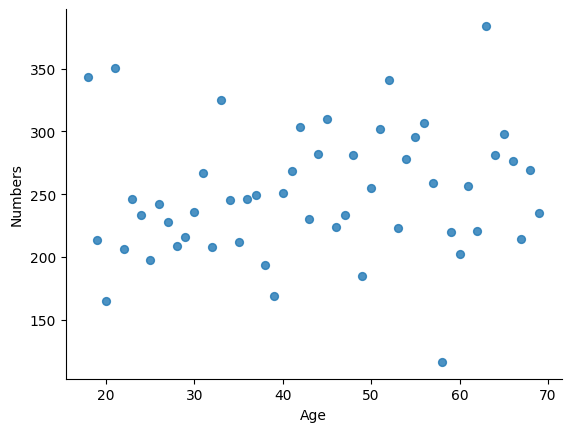

In [ ]:
# @title Age vs Numbers

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Age', y='Numbers', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

# Filtering RDD's, and the Minium Tempreature by Location

In [ ]:
sc.stop()

In [ ]:
from pyspark import SparkConf, SparkContext

conf = SparkConf().setMaster('local').setAppName('TempByLocation')

sc = SparkContext(conf = conf)

In [ ]:
lines = sc.textFile(r'/content/drive/MyDrive/Taming Big Data with Apache Spark and Python - Hands On!/Data/1800.csv')

In [ ]:
lines.collect()[:3]

['ITE00100554,18000101,TMAX,-75,,,E,',
 'ITE00100554,18000101,TMIN,-148,,,E,',
 'GM000010962,18000101,PRCP,0,,,E,']

In [ ]:
def parseLine(line):
  fields = line.split(',')
  stationID = fields[0]
  entryType = fields[2]
  temperature = fields[3]
  return (stationID, entryType, temperature)

In [ ]:
parsedLines = lines.map(parseLine)

In [ ]:
parsedLines.collect()[:3]

[('ITE00100554', 'TMAX', '-75'),
 ('ITE00100554', 'TMIN', '-148'),
 ('GM000010962', 'PRCP', '0')]

In [ ]:
minTemps = parsedLines.filter(lambda x: "TMIN" in x[1])

In [ ]:
minTemps.collect()[:3]

[('ITE00100554', 'TMIN', '-148'),
 ('EZE00100082', 'TMIN', '-135'),
 ('ITE00100554', 'TMIN', '-125')]

In [ ]:
stationTemps = minTemps.map(lambda x: (x[0], x[2]))

In [ ]:
stationTemps.collect()[:3]

[('ITE00100554', '-148'), ('EZE00100082', '-135'), ('ITE00100554', '-125')]

In [ ]:
minTemps = stationTemps.reduceByKey(lambda x, y: min(x, y))
results = minTemps.collect()

In [ ]:
results[:3]

[('ITE00100554', '-10'), ('EZE00100082', '-102')]

In [ ]:
for result in results:
  print(result)

('ITE00100554', '-10')
('EZE00100082', '-102')


## Task 1
Find maxiumum temeprature record by each station

In [ ]:
sc.stop()

In [ ]:
from pyspark import SparkContext, SparkConf

In [ ]:
conf = SparkConf().setMaster('local').setAppName('maxTemp')

sc = SparkContext(conf = conf)

In [ ]:
lines = sc.textFile(r'/content/drive/MyDrive/Taming Big Data with Apache Spark and Python - Hands On!/Data/1800.csv')

In [ ]:
lines.collect()[:3]

['ITE00100554,18000101,TMAX,-75,,,E,',
 'ITE00100554,18000101,TMIN,-148,,,E,',
 'GM000010962,18000101,PRCP,0,,,E,']

In [ ]:
def parseLine(line):
  fields = line.split(',')
  stationId = fields[0]
  entryType = fields[2]
  temperature = float(fields[3]) * 0.1 * (9.0 / 5.0) + 32.0
  return (stationId, entryType, temperature)


In [ ]:
parsedLine = lines.map(parseLine)

In [ ]:
parsedLine.collect()[:3]

[('ITE00100554', 'TMAX', 18.5),
 ('ITE00100554', 'TMIN', 5.359999999999999),
 ('GM000010962', 'PRCP', 32.0)]

In [ ]:
tempMax = parsedLine.filter(lambda x: 'TMAX' in x[1])

In [ ]:
tempMax.collect()[:3]

[('ITE00100554', 'TMAX', 18.5),
 ('EZE00100082', 'TMAX', 16.52),
 ('ITE00100554', 'TMAX', 21.2)]

In [ ]:
stationTemps = tempMax.map(lambda x: (x[0], x[2]))
stationTemps.collect()[:3]

[('ITE00100554', 18.5), ('EZE00100082', 16.52), ('ITE00100554', 21.2)]

In [ ]:
maxTemp = stationTemps.reduceByKey(lambda x, y: max(x, y))
maxTemp.collect()[:3]

[('ITE00100554', 90.14000000000001), ('EZE00100082', 90.14000000000001)]

In [ ]:
results = maxTemp.collect()

for result in results:
  print(result[0] + ' {:.2f}F'.format(result[1]))

ITE00100554 90.14F
EZE00100082 90.14F


# Counting word occurrences using flatmap()

In [ ]:
sc.stop()

In [ ]:
from pyspark import SparkConf, SparkContext

conf = SparkConf().setMaster('local').setAppName('WordCount')
sc = SparkContext(conf = conf)

In [ ]:
input = sc.textFile('/content/drive/MyDrive/Taming Big Data with Apache Spark and Python - Hands On!/Data/Book')

In [ ]:
input.collect()[:3]

['Self-Employment: Building an Internet Business of One',
 'Achieving Financial and Personal Freedom through a Lifestyle Technology Business',
 'By Frank Kane']

In [ ]:
words = input.flatMap(lambda x: x.split())

In [ ]:
words.collect()[:3]

['Self-Employment:', 'Building', 'an']

In [ ]:
wordCounts = words.countByValue()

In [ ]:
for word, count in wordCounts.items():
  cleanWord = word.encode('ascii', 'ignore')
  if (cleanWord):
    print(cleanWord, count)

Streaming output truncated to the last 5000 lines.
b'individual.' 2
b'top-down' 1
b'restrictions' 2
b'make,' 1
b'clients.' 2
b'computer' 6
b'programmer,' 1
b'conform' 1
b'style' 4
b'guide' 1
b'existing' 17
b'architecture' 1
b'artist,' 1
b'show' 16
b'Working' 4
b"what's" 6
b'important.' 8
b'Did' 2
b'dress' 1
b'code' 3
b'yourself?' 1
b'meeting' 2
b'clients,' 2
b'want.' 9
b'maintain' 9
b'wardrobe.' 1
b'Personally,' 2
b'regardless;' 1
b'helps' 4
b'frame' 1
b'mind.' 5
b'IS' 1
b'SELF-EMPLOYMENT' 1
b'FOR' 3
b'YOU?' 1
b'Self-employment' 4
b'forms' 4
b'cannot' 9
b'environment.' 1
b'unbounded' 1
b'rewards,' 2
b'far,' 5
b'serious.' 1
b"Let's" 8
b'you?' 4
b'answer.' 1
b'honestly' 2
b'assess' 1
b'diving' 2
b'undertaking,' 1
b'likelihood' 2
b'success.' 8
b'then,' 1
b'guarantees' 1
b'exercises' 1
b'chapter' 1
b'stand.' 1
b'unimaginably' 1
b'well,' 11
b'badly.' 1
b'We' 6
b'favor' 4
b'not,' 13
b'conventional' 2
b'workforce' 1
b'savings' 7
b'now.' 6
b'FLOWCHART:' 1
b'SHOULD' 1
b'EVEN' 1
b'CONSIDER' 1
b'

## Cleaning data by regural expression

In [ ]:
sc.stop()


In [ ]:
from pyspark import SparkContext, SparkConf
import re

In [ ]:
conf = SparkConf().setMaster('local').setAppName('WordCount-v1')

sc = SparkContext(conf = conf)

In [ ]:
lines = sc.textFile(r'/content/drive/MyDrive/Taming Big Data with Apache Spark and Python - Hands On!/Data/Book')

In [ ]:
lines.collect()[:3]

['Self-Employment: Building an Internet Business of One',
 'Achieving Financial and Personal Freedom through a Lifestyle Technology Business',
 'By Frank Kane']

In [ ]:
def normalizeWord(text):
  return re.compile(r'\W+', re.UNICODE).split(text.lower())

words = lines.flatMap(normalizeWord)

words.collect()[:3]

['self', 'employment', 'building']

In [ ]:
wordsCount = words.countByValue()

for word, count in wordsCount.items():
  cleanWord = word.encode('ascii', 'ignore')
  if cleanWord:
    print(cleanWord, count)

b'self' 111
b'employment' 75
b'building' 33
b'an' 178
b'internet' 26
b'business' 383
b'of' 970
b'one' 100
b'achieving' 1
b'financial' 17
b'and' 934
b'personal' 48
b'freedom' 41
b'through' 57
b'a' 1191
b'lifestyle' 44
b'technology' 11
b'by' 122
b'frank' 11
b'kane' 10
b'copyright' 3
b'2015' 4
b'all' 137
b'rights' 3
b'reserved' 2
b'worldwide' 4
b'contents' 1
b'disclaimer' 2
b'preface' 2
b'part' 33
b'i' 387
b'making' 25
b'the' 1292
b'big' 42
b'decision' 12
b'overcoming' 2
b'inertia' 2
b'fear' 3
b'failure' 3
b'career' 31
b'indoctrination' 5
b'carrot' 4
b'on' 428
b'stick' 6
b'ego' 3
b'protection' 7
b'your' 1420
b'employer' 44
b'as' 343
b'security' 8
b'blanket' 2
b'why' 25
b'it' 649
b's' 391
b'worth' 39
b'unlimited' 6
b'growth' 39
b'potential' 38
b'investing' 16
b'in' 616
b'yourself' 78
b'not' 203
b'someone' 62
b'else' 33
b'no' 76
b'dependencies' 6
b'commute' 14
b'to' 1828
b'live' 25
b'where' 53
b'you' 1878
b'want' 122
b'work' 144
b'when' 102
b'how' 163
b'is' 560
b'for' 537
b'flowchart' 4
b's

## Sorting the result

In [ ]:
sc.stop()

In [ ]:
from pyspark import SparkContext, SparkConf

In [ ]:
conf = SparkConf().setMaster('local').setAppName('WordsCoundSorted')

sc = SparkContext(conf = conf)

In [ ]:
lines = sc.textFile('/content/drive/MyDrive/Taming Big Data with Apache Spark and Python - Hands On!/Data/Book')

In [ ]:
lines.collect()[:3]

['Self-Employment: Building an Internet Business of One',
 'Achieving Financial and Personal Freedom through a Lifestyle Technology Business',
 'By Frank Kane']

In [ ]:
def normalizeWord(text):
  return re.compile(r'\W+', re.UNICODE).split(text.lower())

In [ ]:
words = lines.flatMap(normalizeWord)
words.collect()[:3]

['self', 'employment', 'building']

In [ ]:
wordCounts = words.map(lambda x: (x , 1))
wordCounts.collect()[:3]

[('self', 1), ('employment', 1), ('building', 1)]

In [ ]:
wordCounts = wordCounts.reduceByKey(lambda x, y: x + y)

In [ ]:
wordCounts.collect()[:3]

[('self', 111), ('employment', 75), ('building', 33)]

In [ ]:
def swap(line):
  return (line[1], line[0])

In [ ]:
wordsCountSorted = wordCounts.map(swap)

In [ ]:
wordsCountSorted.collect()[:3]

[(111, 'self'), (75, 'employment'), (33, 'building')]

In [ ]:
results = wordsCountSorted.collect()

In [ ]:
for result in results:
  count = str(result[0])
  word = str(result[1].encode('ascii', 'ignore'))
  if word:
    print(word + ': ' + count)

b'self': 111
b'employment': 75
b'building': 33
b'an': 178
b'internet': 26
b'business': 383
b'of': 970
b'one': 100
b'achieving': 1
b'financial': 17
b'and': 934
b'personal': 48
b'freedom': 41
b'through': 57
b'a': 1191
b'lifestyle': 44
b'technology': 11
b'by': 122
b'frank': 11
b'kane': 10
b'': 772
b'copyright': 3
b'2015': 4
b'all': 137
b'rights': 3
b'reserved': 2
b'worldwide': 4
b'contents': 1
b'disclaimer': 2
b'preface': 2
b'part': 33
b'i': 387
b'making': 25
b'the': 1292
b'big': 42
b'decision': 12
b'overcoming': 2
b'inertia': 2
b'fear': 3
b'failure': 3
b'career': 31
b'indoctrination': 5
b'carrot': 4
b'on': 428
b'stick': 6
b'ego': 3
b'protection': 7
b'your': 1420
b'employer': 44
b'as': 343
b'security': 8
b'blanket': 2
b'why': 25
b'it': 649
b's': 391
b'worth': 39
b'unlimited': 6
b'growth': 39
b'potential': 38
b'investing': 16
b'in': 616
b'yourself': 78
b'not': 203
b'someone': 62
b'else': 33
b'no': 76
b'dependencies': 6
b'commute': 14
b'to': 1828
b'live': 25
b'where': 53
b'you': 1878
b'want

In [ ]:
sc.stop()

# Practice

In [ ]:
from pyspark import SparkConf, SparkContext

In [ ]:
conf = SparkConf().setMaster('local').setAppName('App')
sc = SparkContext(conf = conf)

In [ ]:
lines = sc.textFile('/content/drive/MyDrive/Taming Big Data with Apache Spark and Python - Hands On!/Data/customer-orders.csv')

In [ ]:
lines.collect()[:3]

['44,8602,37.19', '35,5368,65.89', '2,3391,40.64']

In [ ]:
def split_into_fields(line):
  line = line.split(',')
  costumerId = line[0]
  price = line[2]
  return (int(costumerId), float(price))

costByCostumer = lines.map(split_into_fields)
costByCostumer.collect()[:3]

[(44, 37.19), (35, 65.89), (2, 40.64)]

In [ ]:
totalCostByCoustumer = costByCostumer.reduceByKey(lambda x, y: x + y)

In [ ]:
totalCostByCoustumer.collect()[:3]

[(44, 4756.8899999999985), (35, 5155.419999999999), (2, 5994.59)]

In [ ]:
results = totalCostByCoustumer.collect()

In [ ]:
for result in results:
  print(str(result[0]) + ': ' + str(round(result[1], 2)))

44: 4756.89
35: 5155.42
2: 5994.59
47: 4316.3
29: 5032.53
91: 4642.26
70: 5368.25
85: 5503.43
53: 4945.3
14: 4735.03
51: 4975.22
42: 5696.84
79: 3790.57
50: 4517.27
20: 4836.86
15: 5413.51
5: 4561.07
48: 4384.33
31: 4765.05
4: 4815.05
36: 4278.05
57: 4628.4
12: 4664.59
22: 5019.45
54: 6065.39
0: 5524.95
88: 4830.55
86: 4908.81
13: 4367.62
40: 5186.43
98: 4297.26
55: 5298.09
95: 4876.84
61: 5497.48
27: 4915.89
78: 4524.51
83: 4635.8
6: 5397.88
26: 5250.4
75: 4178.5
25: 5057.61
71: 5995.66
39: 6193.11
60: 5040.71
97: 5977.19
7: 4755.07
21: 4707.41
69: 5123.01
37: 4735.2
1: 4958.6
64: 5288.69
82: 4812.49
72: 5337.44
99: 4172.29
34: 5330.8
73: 6206.2
49: 4394.6
8: 5517.24
46: 5963.11
23: 4042.65
19: 5059.43
65: 5140.35
80: 4727.86
16: 4979.06
9: 5322.65
18: 4921.27
59: 5642.89
74: 4647.13
30: 4990.72
56: 4701.02
90: 5290.41
68: 6375.45
11: 5152.29
10: 4819.7
41: 5637.62
58: 5437.73
87: 5206.4
17: 5032.68
33: 5254.66
62: 5253.32
92: 5379.28
76: 4904.21
66: 4681.92
43: 5368.83
52: 5245.06
77

## Sorting by amount spent by costumer

In [ ]:
lines.collect()[:3]

['44,8602,37.19', '35,5368,65.89', '2,3391,40.64']

In [ ]:
def split(line):
  fields = line.split(',')
  return (int(fields[0]), float(fields[2]))

input = lines.map(split)
input.collect()[:3]

[(44, 37.19), (35, 65.89), (2, 40.64)]

In [ ]:
amountBycostumer = input.reduceByKey(lambda x, y: x + y)
amountBycostumer.collect()[:3]

[(44, 4756.8899999999985), (35, 5155.419999999999), (2, 5994.59)]

In [ ]:
def swap(value):
  return (value[1], value[0])
amountBycostumerSorted = amountBycostumer.map(swap).sortByKey().map(swap)

In [ ]:
amountBycostumerSorted.collect()[:3]

[(45, 3309.38), (79, 3790.570000000001), (96, 3924.230000000001)]

In [ ]:
for result in amountBycostumerSorted.collect():
  print(result[0], result[1])

45 3309.38
79 3790.570000000001
96 3924.230000000001
23 4042.6499999999987
99 4172.289999999998
75 4178.500000000001
36 4278.049999999997
98 4297.260000000001
47 4316.299999999999
77 4327.729999999999
13 4367.62
48 4384.33
49 4394.599999999999
94 4475.569999999999
67 4505.79
50 4517.27
78 4524.509999999999
5 4561.069999999999
57 4628.4
83 4635.799999999997
91 4642.259999999999
74 4647.129999999999
84 4652.939999999999
3 4659.63
12 4664.589999999998
66 4681.919999999999
56 4701.019999999999
21 4707.41
80 4727.860000000001
14 4735.030000000001
37 4735.200000000002
7 4755.070000000001
44 4756.8899999999985
31 4765.05
82 4812.489999999998
4 4815.050000000002
10 4819.700000000001
88 4830.549999999999
20 4836.859999999999
89 4851.479999999999
95 4876.840000000002
38 4898.460000000002
76 4904.209999999999
86 4908.81
27 4915.889999999999
18 4921.27
53 4945.299999999999
1 4958.600000000001
51 4975.22
16 4979.06
30 4990.72
28 5000.709999999998
22 5019.449999999999
29 5032.529999999999
17 5032.67